<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-Gridded-Datasets" data-toc-modified-id="Working-with-Gridded-Datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with Gridded Datasets</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Declaring-the-dataset" data-toc-modified-id="Declaring-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Declaring the dataset</a></span></li><li><span><a href="#Conversions" data-toc-modified-id="Conversions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conversions</a></span><ul class="toc-item"><li><span><a href="#Image" data-toc-modified-id="Image-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Image</a></span></li><li><span><a href="#Layout-of-LineContours-,-FilledContours-,-and-Points" data-toc-modified-id="Layout-of-LineContours-,-FilledContours-,-and-Points-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Layout of <code>LineContours</code> , <code>FilledContours</code> , and <code>Points</code></a></span></li><li><span><a href="#Projections" data-toc-modified-id="Projections-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Projections</a></span></li></ul></li><li><span><a href="#Non-geographic-views" data-toc-modified-id="Non-geographic-views-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Non-geographic views</a></span></li><li><span><a href="#Reducing-the-data" data-toc-modified-id="Reducing-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Reducing the data</a></span><ul class="toc-item"><li><span><a href="#Selecting-a-particular-coordinate" data-toc-modified-id="Selecting-a-particular-coordinate-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Selecting a particular coordinate</a></span></li><li><span><a href="#Aggregating-coordinates" data-toc-modified-id="Aggregating-coordinates-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Aggregating coordinates</a></span></li></ul></li><li><span><a href="#Onwards" data-toc-modified-id="Onwards-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Onwards</a></span></li></ul></li></ul></div>

<br>
<img src="https://github.com/pyviz/pyviz/raw/master/notebooks/assets/hv_gv_bk_ds_pa.png" width="50%" style="margin: 0px 25%">

# Working with Gridded Datasets

The main strength of HoloViews and its extensions (like GeoViews) is the ability to quickly explore complex datasets by declaring lower-dimensional views into a higher-dimensional space. In HoloViews we refer to the interface that allows you to do this as the conversion API. 

GeoViews is designed to make full use of multidimensional gridded datasets stored in netCDF or other common formats, via the xarray and iris interfaces in HoloViews. In this tutorial we will be focusing on the xarray interface. 

xarray is a convenient way of working with and representing labelled n-dimensional arrays, like pandas for labelled n-D arrays: 


<img src="https://xarray.pydata.org/en/stable/_images/dataset-diagram-logo.png" width=200px style='float: left'>



**Note:** Describing the details of xarray operations is well beyond the scope of this tutorial, but feel free to check [Pangeo Tutorial for 2018 UCAR Conference](https://github.com/pangeo-data/pangeo-tutorial-sea-2018).


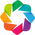

In [127]:
import numpy as np
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
from holoext.bokeh import Mod
import warnings
warnings.filterwarnings('ignore')
hv.extension('matplotlib', 'bokeh')

In [79]:
%opts Image {+framewise} [colorbar=True] Curve [xrotation=60]
%output max_frames=2000 widgets='live' size = 400

## Load the data 

In [80]:
xr_dset = xr.open_dataset('../datasets/berkeley_earth_dataset.nc')
xr_dset

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12, time: 1980)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * time         (time) float64 1.85e+03 1.85e+03 1.85e+03 1.85e+03 1.85e+03 ...
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               17-Feb-2015 11:17:51
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   16-Jan-2015 09:30:27
    ocean_source_history:  08-Jan-2015 06:07:03
    comment:               This file 

The original data was retrieved from [Berkley Earth Project](http://berkeleyearth.org/). It consists of global surface temperatures anomalies. 

Due to the large size of the dataset, we will be working with a small sample of the full data. This slicing will be done along the time coordinate.


In [82]:
dset = xr_dset.isel(time=slice(1940, None))
dset

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12, time: 40)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * time         (time) float64 2.012e+03 2.012e+03 2.012e+03 2.012e+03 ...
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               17-Feb-2015 11:17:51
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   16-Jan-2015 09:30:27
    ocean_source_history:  08-Jan-2015 06:07:03
    comment:               This file contain

## Declaring the dataset 

In a gridded dataset the dimensions are typically alreay declared unambiguously, with **coordinates** (i.e. key dimensions) and **data variables** (i.e. value dimensions) that HoloViews can determine automatically. We can easily wrap this xarray data structure as a GeoViews Dataset:

In [83]:
kdims = ['time', 'latitude', 'longitude']
vdims = ['temperature']

In [114]:
# create a geoviews dataset object with corresponding geographic projection 
xr_dataset = gv.Dataset(dset, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())

In [115]:
print(xr_dataset)

:Dataset   [time,latitude,longitude]   (temperature)


## Conversions

As we saw in [end-to-end example 1](http://nbviewer.jupyter.org/github/andersy005/beyond-matplotlib-tutorial-sea-2018/blob/233ae61968527e739caa928355dbe5a913785d64/notebooks/04-hv-end-to-end-example-1.ipynb), the `dataset.to` interface makes using different visualization elements especially easy. To use it, you supply the Element type that you want to view the data as and the key dimensions of that view and it will figure out the rest. 

Depending on the type of Element, you can specify one or more dimensions to be displayed. GeoViews provides a set of GeoElements that allow you to display geographic data on a cartographic projection, but you can use any Elements from HoloViews for non-geographic plots.



### Image

Note that by default the conversion interface will automatically expand all the individual Elements, which can take some time if the data is very large. Instead we can also request the objects to be expanded dynamically using the dynamic keyword: 

:DynamicMap   [time]
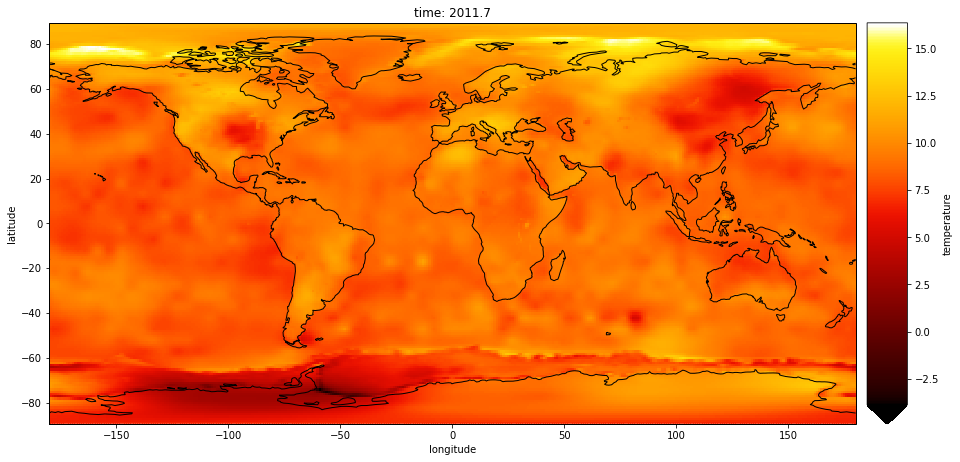

In [116]:
img = xr_dataset.to(gv.Image, kdims=['longitude', 'latitude'], dynamic=True) * gf.coastline
img

### Layout of `LineContours` , `FilledContours` , and `Points` 

:Layout
   .DynamicMap.I   :DynamicMap   [time]
   .DynamicMap.II  :DynamicMap   [time]
   .DynamicMap.III :DynamicMap   [time]
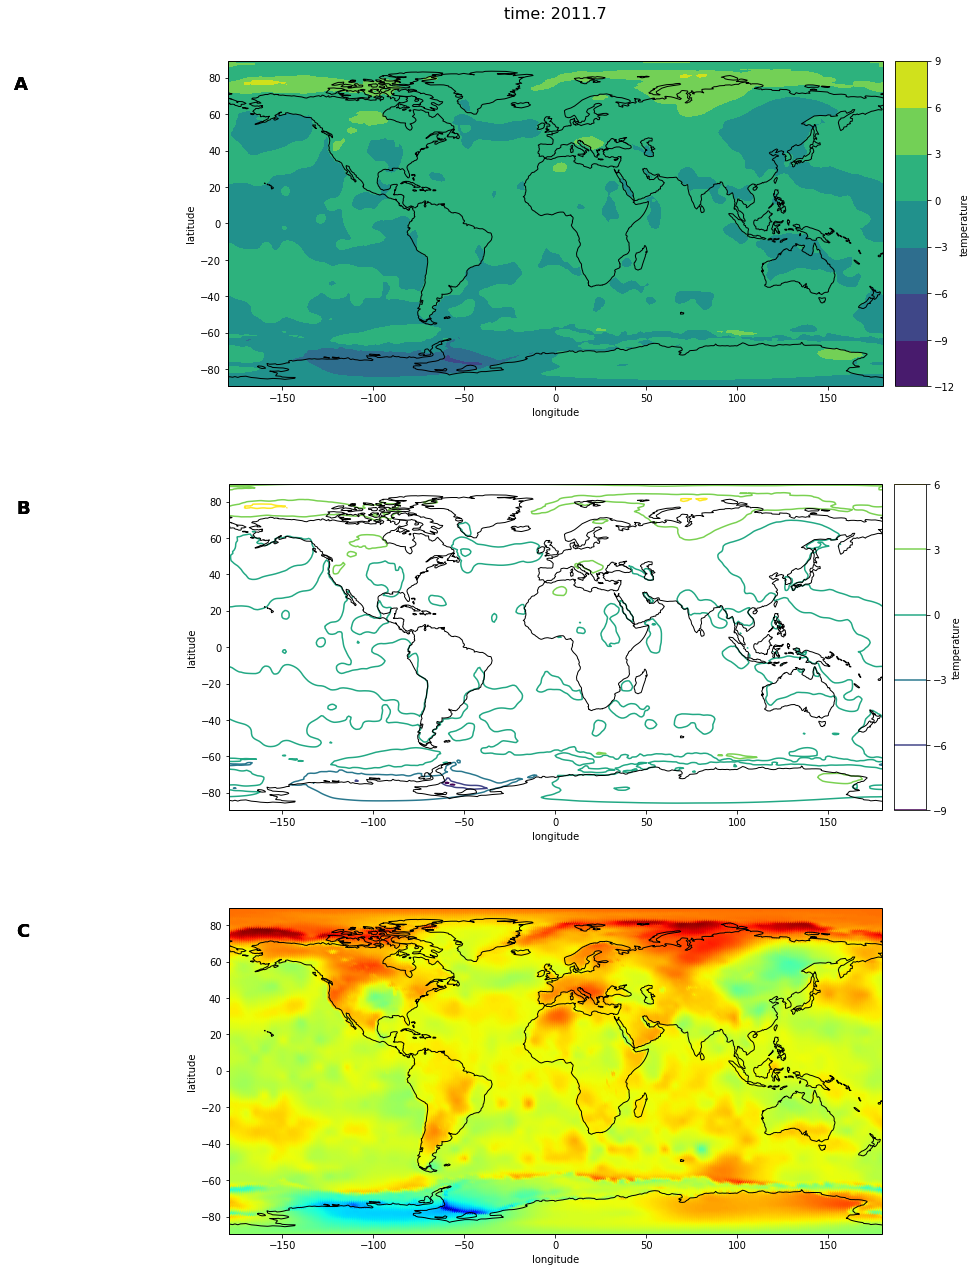

In [117]:
%%opts Points [color_index=2 size_index=None] (cmap='jet')
hv.Layout([
    xr_dataset.to(el, kdims=['longitude', 'latitude'], dynamic=True) * gf.coastline
    for el in [gv.FilledContours, gv.LineContours, gv.Points]
]).cols(1)

Using `dynamic` mode means that the data for each frame is only extracted when you're actually viewing that part of the data, which can have huge benefits in terms of speed and memory consumption. However, it relies on having a running Python process to render and serve each image, and so it cannot be used when generating static HTML output.

### Projections

The geoviews package provides a library of Element types which make it very easy to plot data on various geographic projections. 

With the `matplotlib` backend you can choose between any of the available cartopy projections

`projections = [crs.RotatedPole, crs.Mercator, crs.LambertCylindrical, crs.Geostationary, 
               crs.AzimuthalEquidistant, crs.OSGB, crs.EuroPP, crs.Gnomonic, crs.PlateCarree, 
               crs.Mollweide, crs.OSNI, crs.Miller, crs.InterruptedGoodeHomolosine,
               crs.LambertConformal, crs.SouthPolarStereo, crs.AlbersEqualArea, crs.Orthographic,
               crs.NorthPolarStereo, crs.Robinson]
`

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [longitude,latitude]   (temperature)
      .Coastline.I :Feature   [Longitude,Latitude]
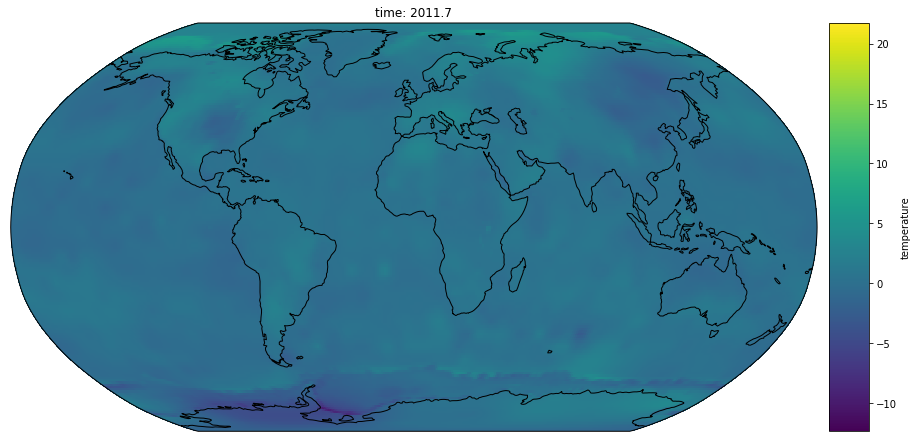

In [122]:
%%opts Image [projection=crs.Robinson()] (cmap='viridis') Overlay [xaxis=None yaxis=None]
xr_dataset.to(gv.Image, ['longitude', 'latitude']) * gf.coastline

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [longitude,latitude]   (temperature)
      .Coastline.I :Feature   [Longitude,Latitude]
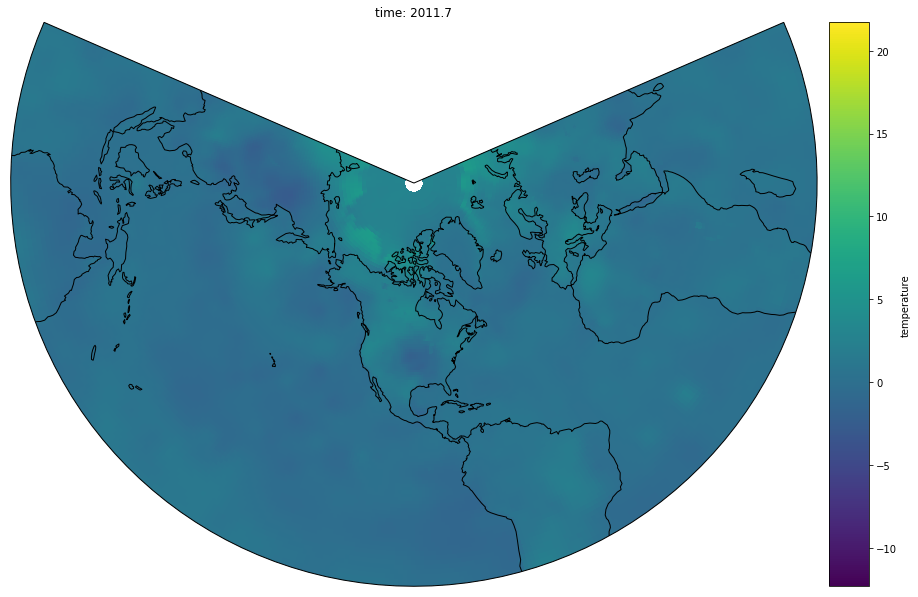

In [121]:
%%opts Image [projection=crs.LambertConformal()] (cmap='viridis') Overlay [xaxis=None yaxis=None]
xr_dataset.to(gv.Image, ['longitude', 'latitude']) * gf.coastline

In [124]:
# Exercise (Optional) Change the projection to one of your choosing with a different `cmap (colormap)`

## Non-geographic views

So far we have focused entirely on geographic views of the data, plotting the data on a projection. However the conversion interface is completely general, allowing us to slice and dice the data in any way we like. For these views we will switch to the bokeh plotting extension: 

In [161]:
%output backend='bokeh'

In [162]:
curve = xr_dataset.to(hv.Curve, kdims=['time'], dynamic=True)
Mod(xrotation=25, width=600, height=400, ylabel='Temperature Anomalies', xlabel='Time').apply(curve)

:DynamicMap   [latitude,longitude]

In [158]:
grid = xr_dataset.to(hv.Distribution, kdims='temperature', groupby='time')
Mod().apply(grid)

:HoloMap   [time]
   :Distribution   [temperature]   (Density)


## Reducing the data

### Selecting a particular coordinate

To examine one particular coordinate, we can select it, cast the data to Curves, reindex the data to drop the now-constant latitude and longitude dimensions, and overlay the remaining 'realization' dimension:



In [168]:
coord = xr_dataset.select(latitude=-14.5, longitude=9.5).to(hv.Curve, ['time'])
Mod(xlabel='Time',
    ylabel='Temperature Anomalies',
    title='Longitude=9.5, Latitude=-14.5').apply(coord)

:HoloMap   [latitude,longitude]
   :Curve   [time]   (temperature)

### Aggregating coordinates

Another option is to aggregate over certain dimensions, so that we can get an idea of distributions of temperature anomalies across all latitudes and longitudes. Here we compute the mean temperature anomaly and standard deviation by latitude and longitude, casting the resulting collapsed view to a Spread Element:


In [173]:
lat = hv.Spread(xr_dataset.aggregate('latitude', np.mean, np.std))
lon = hv.Spread(xr_dataset.aggregate('longitude', np.mean, np.std))
Mod(ylabel= 'Temperature Anomalies').apply(lat + lon)

:Layout
   .Spread.I  :Spread   [latitude]   (temperature,temperature_std)
   .Spread.II :Spread   [longitude]   (temperature,temperature_std)

As you can see, with GeoViews and HoloViews it is very simple to select precisely which aspects of complex, multidimensional datasets that you want to focus on. 

## Onwards

The previous sections focused on displaying plots that provide certain standard types of interactivity, whether widget-based (to select values along a dimension) or within each plot (for panning, zooming, etc.). 